In [53]:
# run this to shorten the data import from the files
import os
path_data = os.path.join(os.path.dirname(os.getcwd()), 'datasets/')


In [54]:
# exercise 01

"""
Interpretation of predictor insight graphs

Consider the predictor insight graph that indicates the relationship between the target incidence and the gender (M - male, F - female) of the candidate donor. The bars indicate the size of the groups, the line indicates the percentage targets.


"""

# Instructions

"""
Females are more likely to donate, and there are more females than males in the database.


Females are less likely to donate, but there are more females than males in the database.


Females are more likely to donate, but there are less females than males in the database. (Answer)


Females are less likely to donate, and there are less females than males in the database.
"""

# solution



#----------------------------------#

# Conclusion

"""
Correct! The bar is higher for males, meaning that there are more males in the database. The line is higher for females, indicating that females are more likely to donate.
"""

'\nCorrect! The bar is higher for males, meaning that there are more males in the database. The line is higher for females, indicating that females are more likely to donate.\n'

In [55]:
import pandas as pd

pig_table = pd.read_csv(path_data+'pig_table.csv')
pig_table.head()

,Country,Size,Incidence
0,India,49849,0.05
1,UK,10057,0.05
2,USA,40094,0.05


In [56]:
# exercise 02

"""
Retrieving information from the predictor insight table

The predictor insight graph table contains all the information needed to construct the predictor insight graph. For each value the predictor takes, it has the number of observations with this value and the target incidence within this group. The predictor insight graph table of the predictor Country is loaded as a pandas object pig_table. You can access elements using indexing. For instance, to retrieve the target incidence of donors living in the UK, you can use:

pig_table["Incidence"][pig_table["Country"]=="UK"]

"""

# Instructions

"""

    Print the number of UK donors.
    Print the target incidence of USA donors.
    Print the target incidence of India donors.

"""

# solution

# Inspect the predictor insight graph table of Country
print(pig_table)

# Print the number of UK donors
print(pig_table["Size"][pig_table["Country"]=="UK"])

# Check the target incidence of USA and India donors
print(pig_table["Incidence"][pig_table["Country"]=="USA"])
print(pig_table["Incidence"][pig_table["Country"]=="India"])

#----------------------------------#

# Conclusion

"""
Well done! The target incidence of USA and India donors is the same, indicating that country is not a good variable to predict donations.
"""

  Country   Size  Incidence
0   India  49849       0.05
1      UK  10057       0.05
2     USA  40094       0.05
1    10057
Name: Size, dtype: int64
2    0.05
Name: Incidence, dtype: float64
0    0.05
Name: Incidence, dtype: float64


'\nWell done! The target incidence of USA and India donors is the same, indicating that country is not a good variable to predict donations.\n'

In [57]:
basetable = pd.read_csv(path_data+'basetable_ch4.csv')
basetable.head()

,Unnamed: 0,target,time_since_last_donation
0,0,1,808
1,1,1,977
2,2,1,641
3,3,1,368
4,4,1,536


In [58]:
# exercise 03

"""
Discretization of a certain variable

In order to make predictor insight graphs for continuous variables, you first need to discretize them. In Python, you can discretize pandas columns using the qcut method.

To check whether the variable was nicely discretized, you can verify that the bins have equal size using the groupby method:

print(basetable.groupby("discretized_variable").size()

"""

# Instructions

"""

    Use the method qcut to discretize the variable time_since_last_donation in 10 groups. Assing this variable to a new column called "bins_recency".
    Use the method groupby to verify that the bins have about equal size.

"""

# solution
print(basetable.groupby("time_since_last_donation").size())
# Discretize the variable time_since_last_donation in 10 bins
basetable["bins_recency"] = pd.qcut(basetable['time_since_last_donation'],10)

# Print the group sizes of the discretized variable
print(basetable.groupby("bins_recency").size())

#----------------------------------#

# Conclusion

"""
Great job! The variable is binned in 10 bins that have each about 10 000 observations in it!
"""

time_since_last_donation
32      25
33      13
34      17
35      18
36      20
        ..
2203     1
2232     1
2254     1
2305     1
2518     1
Length: 1864, dtype: int64
bins_recency
(31.999, 319.0]     10058
(319.0, 462.0]       9953
(462.0, 574.0]       9999
(574.0, 657.0]      10070
(657.0, 738.0]      10002
(738.0, 833.0]       9994
(833.0, 933.0]       9962
(933.0, 1050.0]     10009
(1050.0, 1209.0]    10004
(1209.0, 2518.0]     9949
dtype: int64


'\nGreat job! The variable is binned in 10 bins that have each about 10 000 observations in it!\n'

In [59]:
basetable = pd.read_csv(path_data+'basetable_ch4-02.csv')
basetable.head()

,target,gender_F,gender_M,income_average,income_low,income_high,country_USA,country_India,country_UK,age,time_since_last_gift,time_since_first_gift,max_gift,min_gift,mean_gift,median_gift
0,0,0,0,1,0,0,0,1,0,74,803,2121,102.0,46.0,75.714286,77.0
1,0,0,0,1,0,0,1,0,0,50,685,685,69.0,69.0,69.000000,69.0
2,0,0,0,1,0,0,1,0,0,48,550,2617,109.0,49.0,74.250000,69.5
3,0,0,0,1,0,0,1,0,0,29,1125,2216,105.0,97.0,101.000000,101.0
4,1,1,1,1,0,0,0,1,0,74,635,2637,126.0,75.0,101.636364,101.0


In [60]:
# exercise 04

"""
Discretizing all variables

Instead of discretizing the continuous variables one by one, it is easier to discretize them automatically. To get a list of all the columns in Python, you can use

variables  = basetable.columns

Only variables that are continuous should be discretized. You can verify whether variables should be discretized by checking whether they have more than a predefined number of different values.
"""

# Instructions

"""

    Make a list variables containing all the column names of the basetable.
    Create a loop that checks all the variables in the list variables.
    Complete the ifstatement such that only variables with more than 5 different values are discretized.
    Group the continuous variables in 10 bins using the qcut method.

"""

# solution

# Print the columns in the original basetable
print(basetable.columns)

# Get all the variable names except "target"
variables = list(basetable.columns)
variables.remove("target")

# Loop through all the variables and discretize in 10 bins if there are more than 5 different values
for variable in variables:
    if len(basetable.groupby(variable))>5:
        new_variable = "disc_" + variable
        basetable[new_variable] = pd.qcut(basetable[variable], 10)
        
# Print the columns in the new basetable
print(basetable.columns)

#----------------------------------#

# Conclusion

"""
Well done!
"""

Index(['target', 'gender_F', 'gender_M', 'income_average', 'income_low',
       'income_high', 'country_USA', 'country_India', 'country_UK', 'age',
       'time_since_last_gift', 'time_since_first_gift', 'max_gift', 'min_gift',
       'mean_gift', 'median_gift'],
      dtype='object')
Index(['target', 'gender_F', 'gender_M', 'income_average', 'income_low',
       'income_high', 'country_USA', 'country_India', 'country_UK', 'age',
       'time_since_last_gift', 'time_since_first_gift', 'max_gift', 'min_gift',
       'mean_gift', 'median_gift', 'disc_age', 'disc_time_since_last_gift',
       'disc_time_since_first_gift', 'disc_max_gift', 'disc_min_gift',
       'disc_mean_gift', 'disc_median_gift'],
      dtype='object')


'\nWell done!\n'

In [61]:
basetable = pd.read_csv(path_data+'basetable_ex2_4.csv')

In [62]:
# exercise 05

"""
Making clean cuts

The qcut method divides the variable in n_bins equal bins. In some cases, however, it is nice to choose your own bins. The method cut in python allows you to choose your own bins.
"""

# Instructions

"""

    Discretize the variable number_gift in three bins with borders 0 and 5, 5 and 10, 10 and 20 and assign this variable to a new column called disc_number_gift.
    Count the number of observations in each group.

"""

# solution

# Discretize the variable 
basetable["disc_number_gift"] = pd.cut(basetable['number_gift'],[0, 5, 10, 20])

# Count the number of observations per group
print(basetable.groupby("disc_number_gift").size())

#----------------------------------#

# Conclusion

"""
Excellent! Notice that the bins aren't approximately equally sized anymore.
"""

disc_number_gift
(0, 5]      13808
(5, 10]     10220
(10, 20]      972
dtype: int64


"\nExcellent! Notice that the bins aren't approximately equally sized anymore.\n"

In [63]:
def reverse_one_hot(df):
    return df.idxmax(axis=1)


In [64]:
basetable = pd.read_csv(path_data+'basetable_ch4-02.csv')

basetable['income'] = reverse_one_hot(basetable[['income_high', 'income_average', 'income_low']])

In [65]:
# exercise 06

"""
Calculating average incidences

The most important column in the predictor insight graph table is the target incidence column. This column shows the average target value for each group.
"""

# Instructions

"""

    Create a DataFrame basetable_income that only contains the variables target and income.
    Group this DataFrame by income.
    Calculate the average target incidence for each group in income.

"""

# solution

# Select the income and target columns
basetable_income = basetable[["target","income"]]

# Group basetable_income by income
groups = basetable_income.groupby("income")

# Calculate the target incidence and print the result
incidence = groups["target"].agg(Incidence = 'mean').reset_index()
print(incidence)

#----------------------------------#

# Conclusion

"""
Great job! You can observe that the higher a donor's income, the more likely he is to donate for the campaign.
"""

           income  Incidence
0  income_average   0.049064
1     income_high   0.061402
2      income_low   0.042356


"\nGreat job! You can observe that the higher a donor's income, the more likely he is to donate for the campaign.\n"

In [66]:
def create_pig_table(df, target, variable):
    # Group by the variable you want to plot
    groups = df[[target,variable]].groupby(variable)
    # Calculate the size and incidence of each group
    pig_table = groups[target].agg({'Incidence' : np.mean,'Size' : np.size}).reset_index()
    return pig_table

In [67]:
basetable['gender'] = reverse_one_hot(basetable[['gender_F', 'gender_M']])
basetable.gender.value_counts()

gender
gender_F    70000
Name: count, dtype: int64

In [68]:
# exercise 07

"""
Constructing the predictor insight graph table

In the previous exercise you learned how to calculate the incidence column of the predictor insight graph table. In this exercise, you will also add the size of the groups, and wrap everything in a function that returns the predictor insight graph table for a given variable.
"""

# Instructions

"""

    Group the basetable by variable.
    Calculate the predictor insight graph table by calculating the target incidence and group sizes.
    Use the function create_pig_table to calculate the predictor insight graph table for the variable "gender".

"""

# solution

# Function that creates predictor insight graph table
def create_pig_table(basetable, target, variable):
  
    # Create groups for each variable
    groups = basetable[[target,variable]].groupby(variable)
    
    # Calculate size and target incidence for each group
    pig_table = groups[target].agg(Incidence = 'mean', Size = 'count').reset_index()
    
    # Return the predictor insight graph table
    return pig_table

# Calculate the predictor insight graph table for the variable gender
pig_table_gender = create_pig_table(basetable, "target", 'gender')

# Print the result
print(pig_table_gender)

#----------------------------------#

# Conclusion

"""
Nice! The predictor insight graph table shows that females are more likely to donate than males.
"""

     gender  Incidence   Size
0  gender_F   0.049686  70000


'\nNice! The predictor insight graph table shows that females are more likely to donate than males.\n'

In [69]:
# Get all the variable names except "target"
variables = list(basetable.columns)
variables.remove("target")

# Loop through all the variables and discretize in 10 bins if there are more than 5 different values
for variable in variables:
    if len(basetable.groupby(variable))>5:
        new_variable = "disc_" + variable
        basetable[new_variable] = pd.qcut(basetable[variable], 10)

In [70]:
# exercise 08

"""
Grouping all predictor insight graph tables

In the previous exercise, you constructed a function that calculates the predictor insight graph table for a given variable as follows:

pig_table = create_pig_table(basetable, "target","variable")

If you want to calculate the predictor insight graph table for many variables at once, it is a good idea to store them in a dictionary. You can create a new dictionary using dictionary = {}, add elements with a key using dictionary["key"] = value and retrieve elements using the key print(dictionary["key"]).
"""

# Instructions

"""

    Create an empty dictionary pig_tables.
    For each variable, create a predictor insight graph table.
    For each variable, add this predictor insight graph table to the dictionary, with as key the name of the variable.
    Print the predictor insight graph table of disc_time_since_last_gift.

"""

# solution

# Create the list of variables for our predictor insight graph tables
variables = ["income","gender","disc_mean_gift","disc_time_since_last_gift"]

# Create an empty dictionary
pig_tables = {}

# Loop through the variables
for variable in variables:
  
    # Create a predictor insight graph table
    pig_table = create_pig_table(basetable, 'target', variable)
    
    # Add the table to the dictionary
    pig_tables[variable] = pig_table

# Print the predictor insight graph table of the variable "disc_time_since_last_gift"
print(pig_tables["disc_time_since_last_gift"])

#----------------------------------#

# Conclusion

"""
Great job! The predictor insight graph table shows that people who donated recently are more likely to donate again.
"""

  disc_time_since_last_gift  Incidence  Size
0           (31.999, 319.0]   0.088290  7011
1            (319.0, 462.0]   0.069393  7018
2            (462.0, 574.0]   0.052864  7018
3            (574.0, 657.0]   0.065334  7056
4            (657.0, 737.0]   0.059402  6919
5            (737.0, 833.0]   0.045092  7030
6            (833.0, 933.0]   0.036995  6974
7           (933.0, 1051.0]   0.031451  6995
8          (1051.0, 1209.1]   0.027368  6979
9          (1209.1, 2518.0]   0.020429  7000


'\nGreat job! The predictor insight graph table shows that people who donated recently are more likely to donate again.\n'

In [71]:
pig_table = pd.read_csv(path_data+'pig_table.csv')
pig_table.iloc[0,2] = 0.051
pig_table.iloc[1,2] = 0.051
pig_table.iloc[2,2] = 0.048

In [72]:
pig_table

,Country,Size,Incidence
0,India,49849,0.051
1,UK,10057,0.051
2,USA,40094,0.048


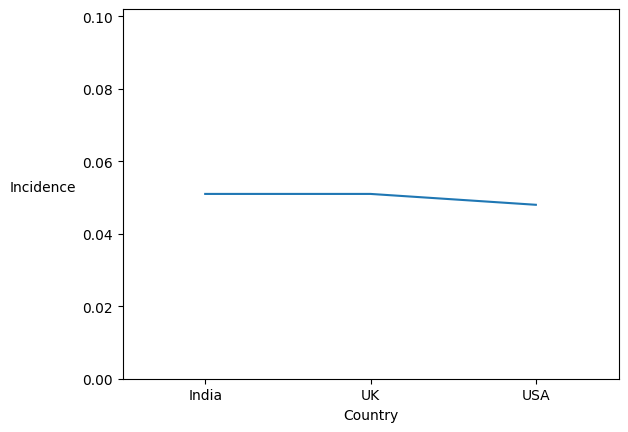

'\nGreat work!\n'

In [73]:
# exercise 09

"""
Plotting the incidences

The most important element of the predictor insight graph are the incidence values. For each group in the population with respect to a given variable, the incidence values reflect the percentage of targets in that group. In this exercise, you will write a python function that plots the incidence values of a variable, given the predictor insight graph table.
"""

# Instructions

"""

    Select the right column in the predictor insight graph table and plot this column.
---

    The predictor insight graph table is given in pig_table. Use the function plot_incidence to show the predictor insight graph of the variable "country".

"""

# solution
import matplotlib.pyplot as plt
import numpy as np
# The function to plot a predictor insight graph.
def plot_incidence(pig_table, variable):
    
    # Plot the incidence line
    pig_table["Incidence"].plot()
    
    # Formatting the predictor insight graph
    plt.xticks(np.arange(len(pig_table)), pig_table[variable])
    plt.xlim([-0.5, len(pig_table) - 0.5])
    plt.ylim([0, max(pig_table["Incidence"]*2)])
    plt.ylabel("Incidence", rotation=0, rotation_mode="anchor", ha="right")
    plt.xlabel(variable)
    
    # Show the graph
    plt.show()

# Apply the function for the variable "country".
plot_incidence(pig_table, "Country")

#----------------------------------#

# Conclusion

"""
Great work!
"""

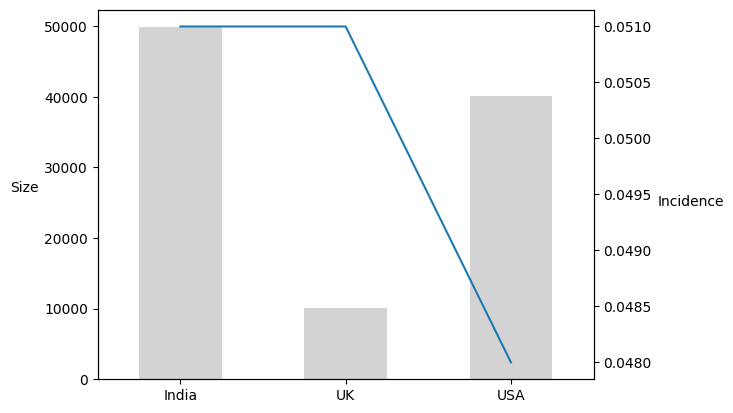

'\nGreat work!\n'

In [74]:
# exercise 10

"""
Plotting the group sizes

The predictor insight graph gives information about predictive variables. Each variable divides the population in several groups. The predictor insight graph has a line that shows the average target incidence for each group, and a bar that shows the group sizes. In this exercise, you will learn how to write and apply a function that plots a predictor insight graph, given a predictor insight graph table.
"""

# Instructions

"""

    Plot the bars that show the Size of each group.
    Plot the incidence line that shows the average target incidence of each group.
---

"""

# solution

# The function to plot a predictor insight graph
def plot_pig(pig_table, variable):
    
    # Plot formatting
    plt.ylabel("Size", rotation=0, rotation_mode="anchor", ha="right")
    
    # Plot the bars with sizes 
    pig_table["Size"].plot(kind="bar", width=0.5, color="lightgray", edgecolor="none") 
    
    # Plot the incidence line on secondary axis
    pig_table["Incidence"].plot(secondary_y=True)
    
    # Plot formatting
    plt.xticks(np.arange(len(pig_table)), pig_table[variable], rotation=50)
    plt.xlim([-0.5, len(pig_table) - 0.5])
    plt.ylabel("Incidence", rotation=0, rotation_mode="anchor", ha="left")
    
    # Show the graph
    plt.show()
    
# Apply the function for the variable "country"
plot_pig(pig_table, "Country")

#----------------------------------#

# Conclusion

"""
Great work!
"""

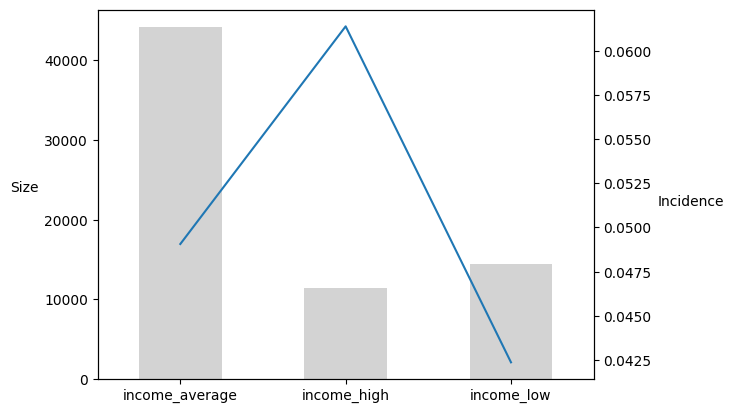

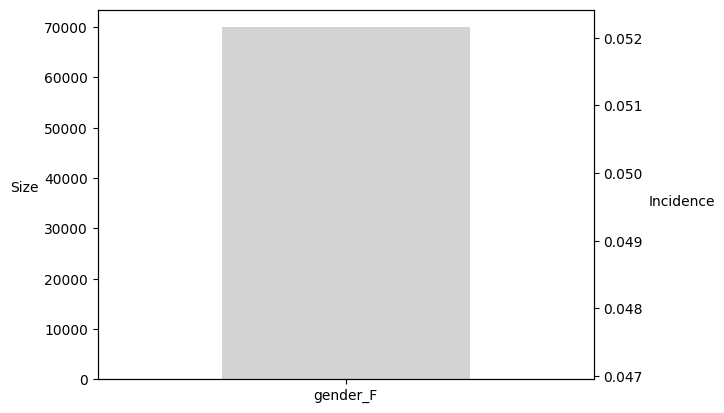

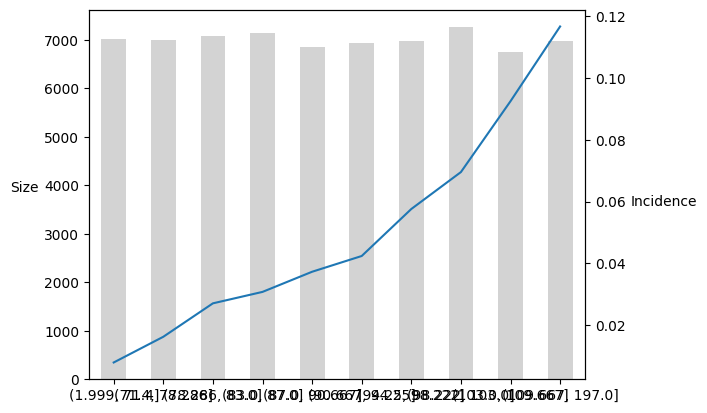

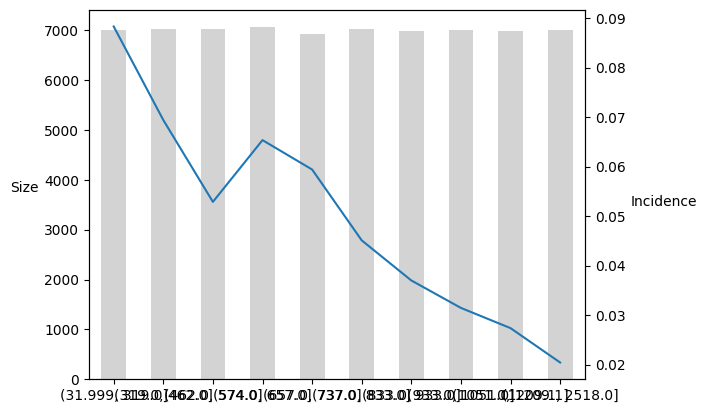

'\nExcellent job!\n'

In [75]:
# exercise 11

"""
Putting it all together

In the previous exercises, you defined a function create_pig_table that, given a basetable and a predictor, creates a predictor insight graph table for this predictor:

pig_table = create_pig_table(basetable,target,variable)

Next, you wrote a function plot_pig that plots the predictor insight graph based on this predictor insight graph table

plot_pig(pig_table, variable)

Often, you want to make many predictor insight graphs at once. In this exercise, you will learn how to automatically do this using a for loop.
"""

# Instructions

"""

    For each variable in variables, create a predictor insight graph table. The basetable is loaded in basetable.
    For each variable in variables, plot the predictor insight graph.

"""

# solution

# Variables you want to make predictor insight graph tables for
variables = ["income","gender","disc_mean_gift","disc_time_since_last_gift"]

# Loop through the variables
for variable in variables: 
    
    # Create the predictor insight graph table
    pig_table = create_pig_table(basetable, "target", variable)
    
    # Plot the predictor insight graph
    plot_pig(pig_table, variable)

#----------------------------------#

# Conclusion

"""
Excellent job!
"""